# Text 사용하기

## title & label

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [3]:
student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


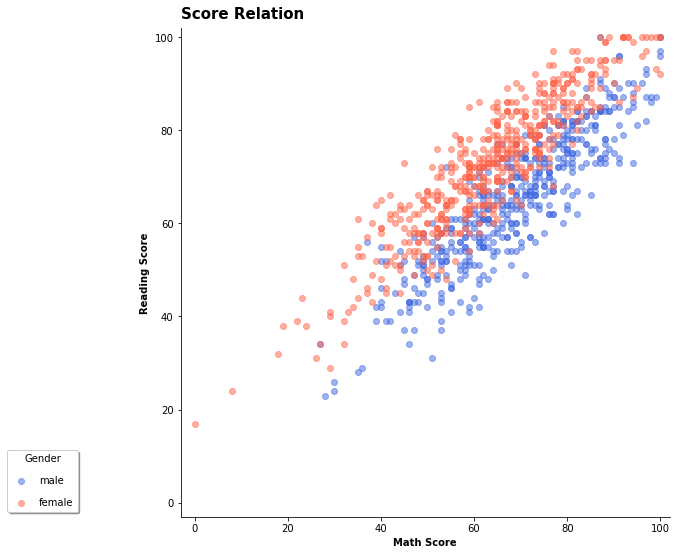

In [13]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score', 
              fontweight='semibold') # 폰트 굵기
ax.set_ylabel('Reading Score', 
              fontweight='semibold')

ax.set_title('Score Relation', 
             loc='left', va='bottom', # loc : 정렬 방향. 왼쪽으로 정렬
             fontweight='bold', fontsize=15
            )

ax.legend(
    title='Gender',
    shadow=True,        # 범례 박스에 그림자 효과 넣기
    labelspacing=1.2,
    loc='lower right',   # 범례 박스의 위치 지정. 기본은 가장 시각적으로 방해 받지 않는 곳.
    bbox_to_anchor=[-0.2, 0]  # 범례 박스를 외부에 배치. 위치 지정.
)


plt.show()

## ticks & text

In [14]:
def score_band(x):
    temp = (x+9)//10
    if temp <= 1: 
        return '0 - 10'
    return f'{tmp*10-9} - {tmp*10}'

student['math-range'] = student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

0 - 10        2
11 - 20       2
21 - 30      12
31 - 40      34
41 - 50     100
51 - 60     189
61 - 70     270
71 - 80     215
81 - 90     126
91 - 100     50
Name: math-range, dtype: int64

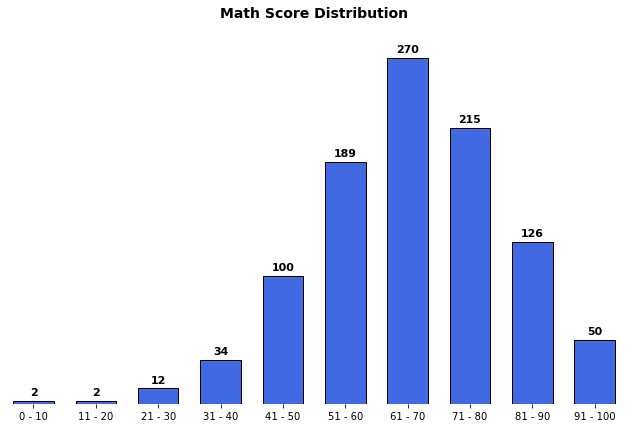

In [22]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.01, 0.1)
ax.set(frame_on=False) # 테두리(축 포함) 없애기
ax.set_yticks([]) # y축 눈금 없애기
ax.set_xticks(np.arange(len(math_grade))) #### 주석 처리해도 결과가 같은데?
ax.set_xticklabels(math_grade.index)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

for idx, val in math_grade.iteritems():
    ax.text(x=idx, y=val+3, s=val, 
            va='bottom', ha='center', # 막대의 중앙, 막대 위 배치
            fontsize=11, fontweight='semibold'
           )

plt.show()

## Annotate

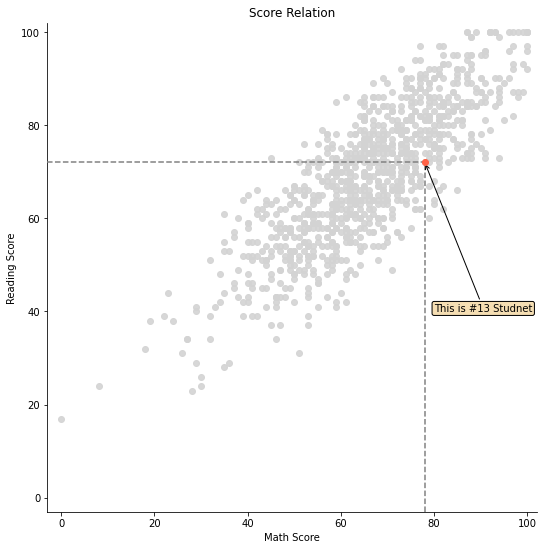

In [24]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = 13

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9, zorder=5)
    
# 이 점에 대한 눈금선과 annotate 추가
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1, zorder=10)    # zorder 가장 위
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 

# x축과 평행한 선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--', # 점선
        zorder=8)

# y축과 평행한 선
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
       color='gray', linestyle='--', # 점선
       zorder=8)

bbox = dict(boxstyle="round", fc='wheat', pad=0.2) # bbox 옵션
arrowprops = dict(arrowstyle="->") # 화살표 옵션

ax.annotate(text=f'This is #{i} Studnet',
            xy=(student['math score'][i], student['reading score'][i]), # 원하는 위치
            xytext=[80, 40], # 텍스트의 위치. 화살표를 사용할 거면 텍스트의 위치와 화살표가 가리키는 위치를 다 지정해줘야함.
            bbox=bbox, # 텍스트의 bbox
            arrowprops=arrowprops, # 화살표
            zorder=9
           )

plt.show()

# Color 사용하기

## 범주형

In [38]:
from matplotlib.colors import ListedColormap

print(plt.cm.get_cmap('tab10').colors) # RGB 값 출력
c = ListedColormap(plt.cm.get_cmap('tab10').colors)
print(c)

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))


In [32]:
# Group to Number
groups = sorted(student['race/ethnicity'].unique())
gton = dict(zip(groups , range(5)))

# Group에 따라 색 매핑 (1, 2, 3, 4, 5)
student['color'] = student['race/ethnicity'].map(gton)

In [33]:
student['color']

0      1
1      2
2      1
3      0
4      2
      ..
995    4
996    2
997    2
998    3
999    3
Name: color, Length: 1000, dtype: int64

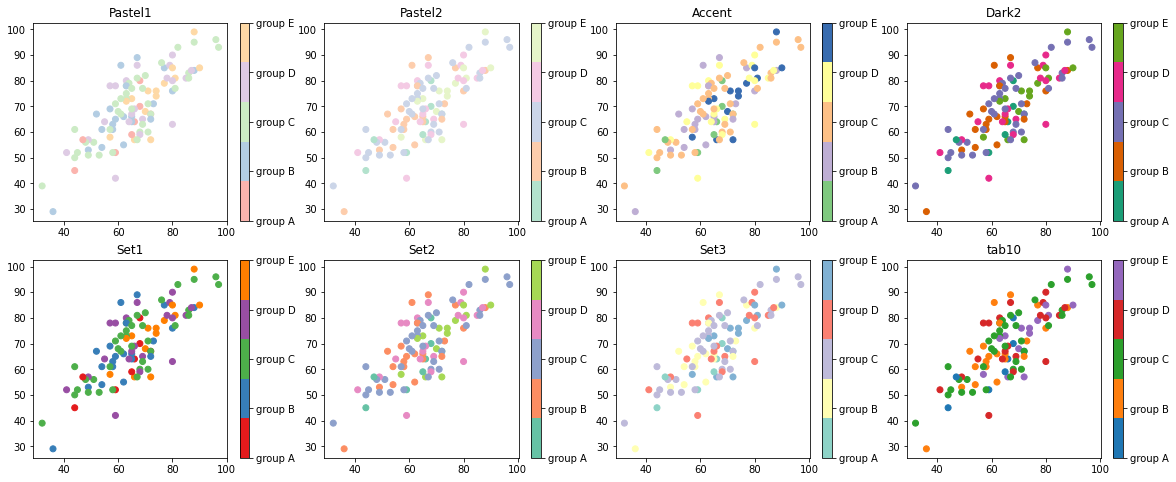

In [34]:
# 팔레트 별 plot
qualitative_cm_list = ['Pastel1', 'Pastel2', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(qualitative_cm_list):    
    pcm = axes[idx].scatter(student_sub['math score'], student_sub['reading score'],
                     c=student_sub['color'], cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5]) # 팔레트 적용
                     )
    cbar = fig.colorbar(pcm, ax=axes[idx], ticks=range(5))
    cbar.ax.set_yticklabels(groups)
    axes[idx].set_title(cm)
    
plt.show()

## 연속형

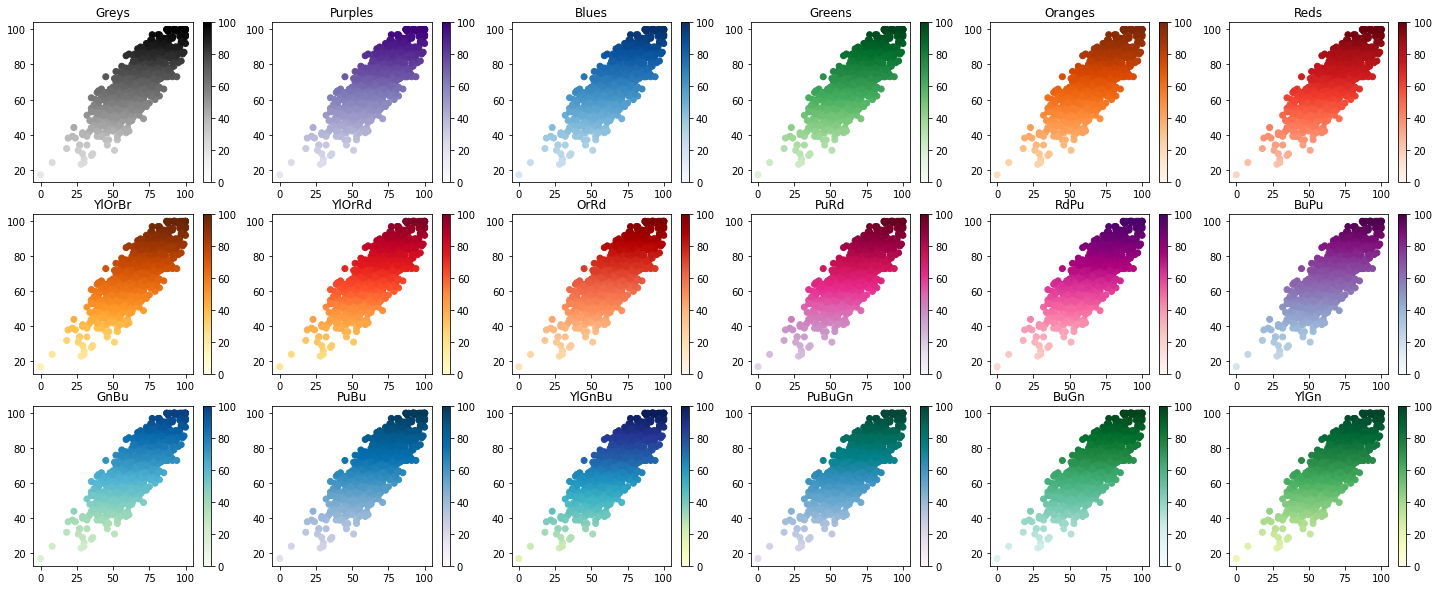

In [43]:
sequential_cm_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', # 그라데이션 이름들
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

fig, axes = plt.subplots(3, 6, figsize=(25, 10))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(sequential_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=student['reading score'], 
                            cmap=cm,
                            vmin=0, vmax=100 # 제일 작은 값과 제일 큰 값. vmin보다 작은 값은 전부 최소 색상, vmax보다 큰 값은 전부 최대 색상
                     )
    fig.colorbar(pcm, ax=axes[idx]) # 컬러바 추가.
    axes[idx].set_title(cm)
    
plt.show()

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
 [144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175]
 [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191]
 [192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207]
 [208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223]
 [224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 

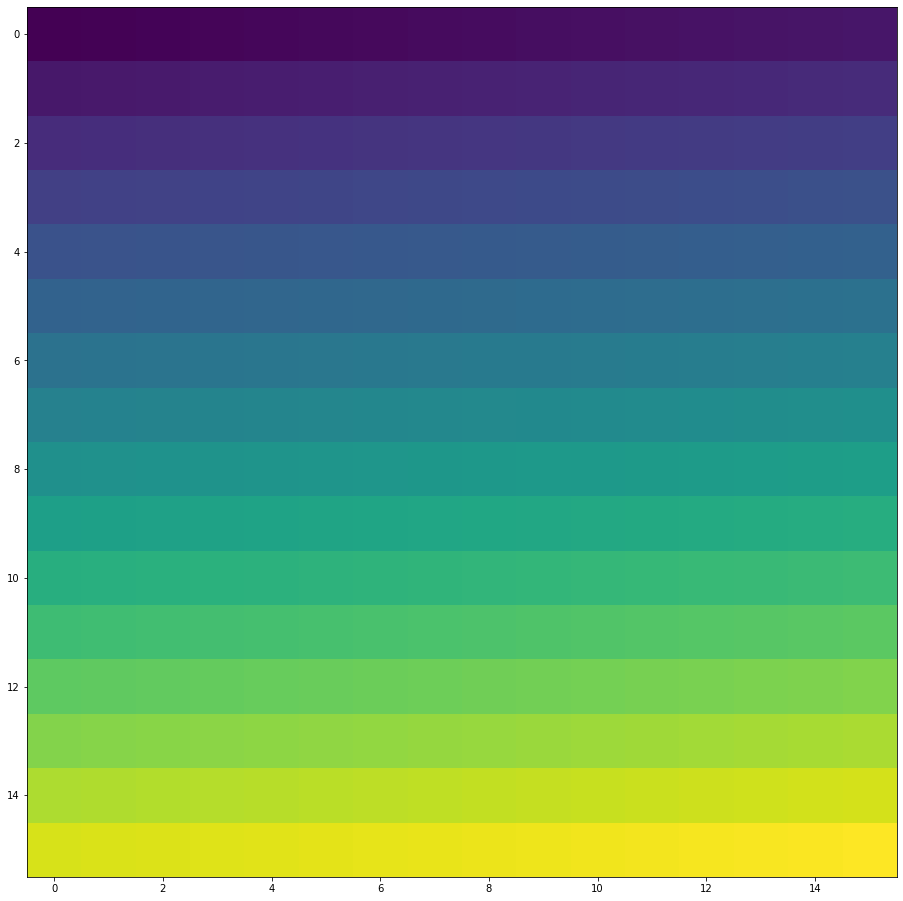

In [49]:
# imshow 사용.
im = np.arange(256).reshape(16, 16)
print(im)
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(im) 
plt.show()

## 발산형

In [48]:
from matplotlib.colors import TwoSlopeNorm

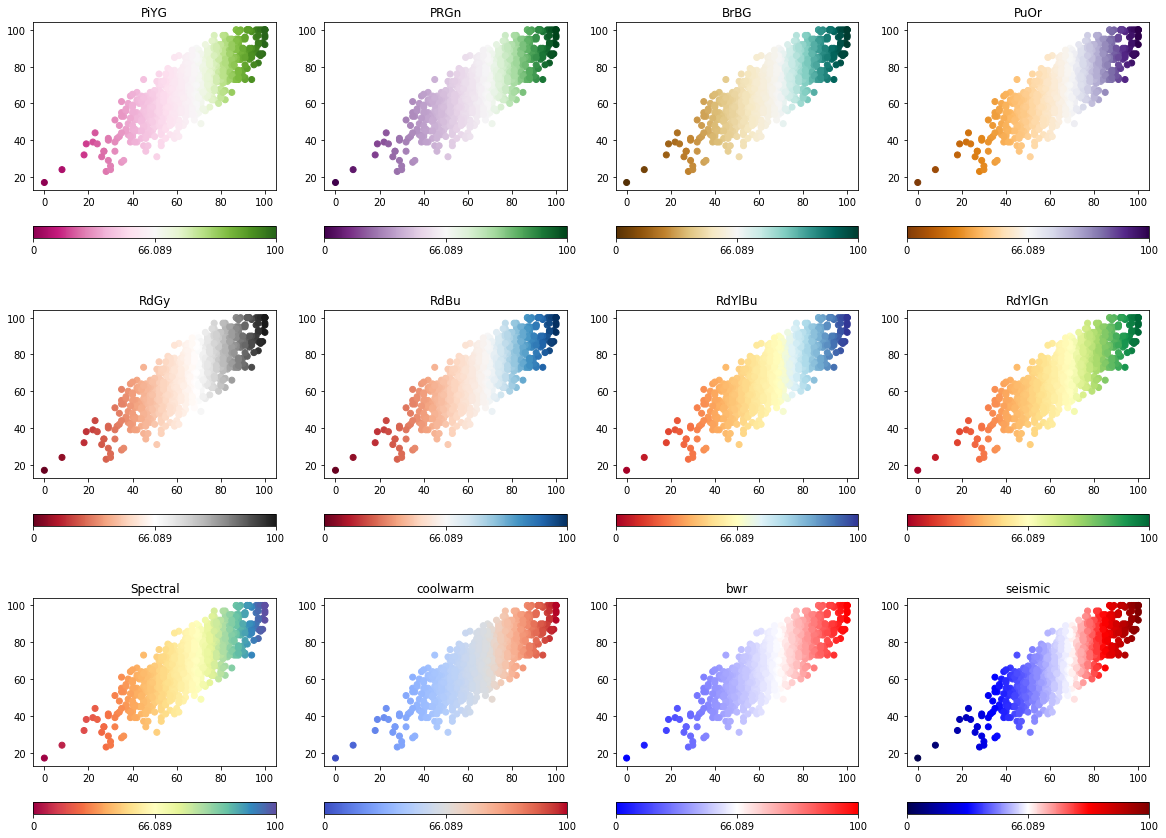

In [55]:
diverging_cm_list = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

offset = TwoSlopeNorm(vmin=0, vcenter=student['reading score'].mean(), vmax=100) # 컬러 매핑을 위한 오프셋

student_sub = student.sample(100)

for idx, cm in enumerate(diverging_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=offset(student['math score']), 
                            cmap=cm,
                     )
    cbar = fig.colorbar(pcm, ax=axes[idx], 
                        ticks=[0, 0.5, 1], # 눈금 위치
                        orientation='horizontal' # 컬러바 방향
                       )
    cbar.ax.set_xticklabels([0, student['math score'].mean(), 100]) # 컬러바 눈금
    axes[idx].set_title(cm)
    
plt.show()

In [53]:
print(offset([0, 1, 3, 4, 6, 100])) # 최대 최소를 설정하여 상대 값을 구함.

[0.         0.00722867 0.02168602 0.02891469 0.04337203 1.        ]


## 색상 대비

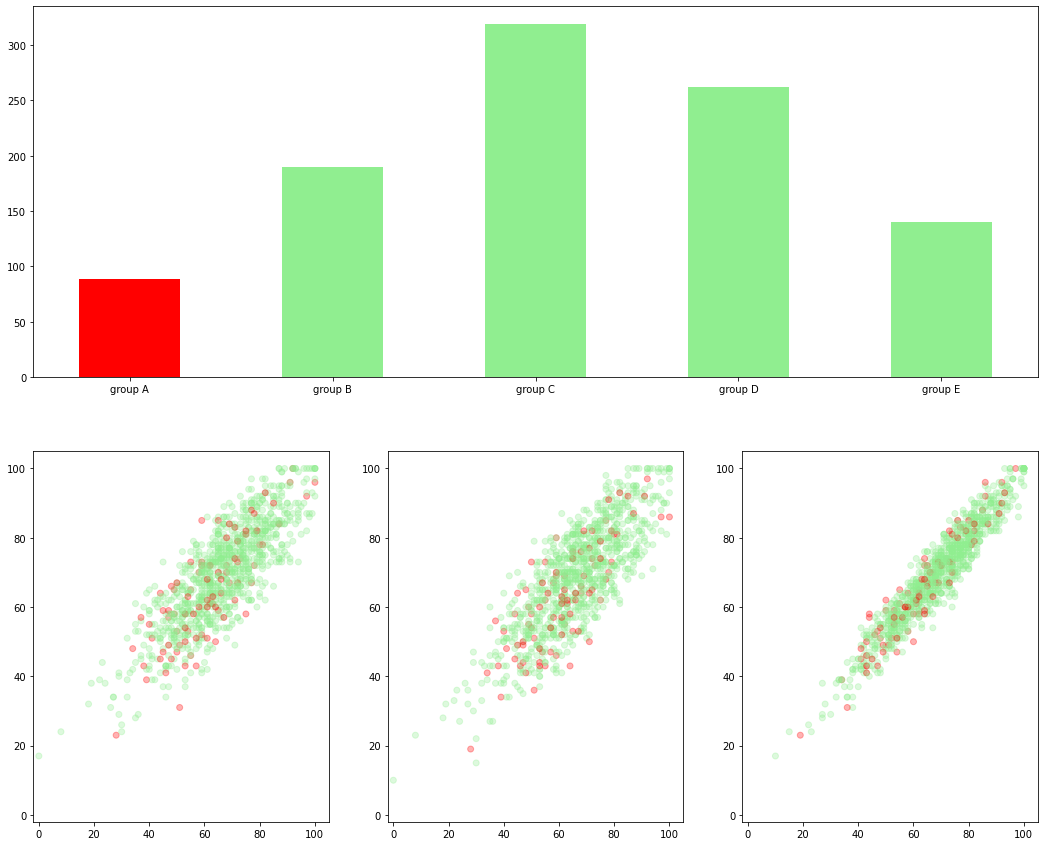

In [60]:
# 특정 그룹만 다른 색으로 표현하여 강조

a_color, nota_color = 'red', 'lightgreen'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

# Facet 사용하기

## Subplot

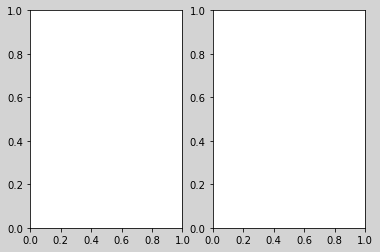

In [62]:
# add_subplot
fig = plt.figure()
fig.set_facecolor('lightgray') # 배경색 지정.
ax = fig.add_subplot(121)
ax = fig.add_subplot(122)
plt.show()

# subplots
# fig, axes = plt.subplots(1, 2)

### DPI (dots per inch)

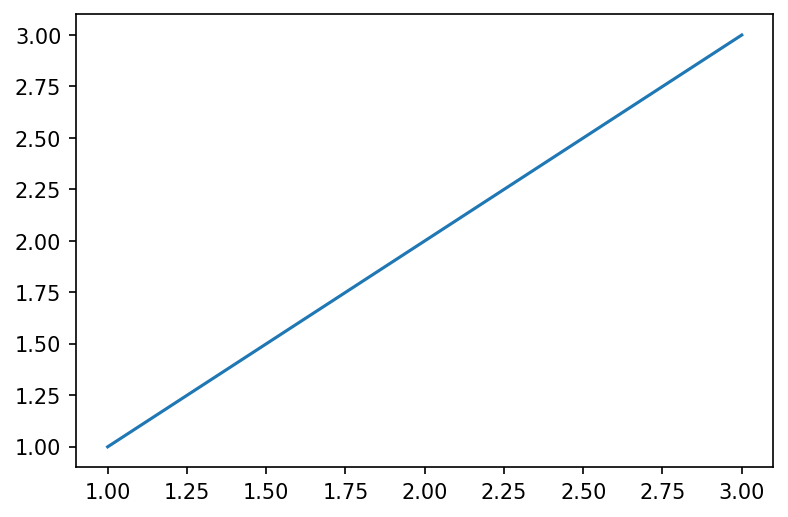

In [66]:
fig = plt.figure(dpi=150) # 해상도 높임. 
ax = fig.add_subplot()
ax.plot([1, 2, 3], [1, 2, 3])
plt.show()

### sharex, sharey

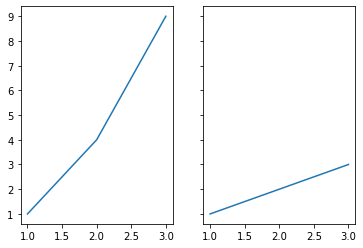

In [67]:
fig, axes = plt.subplots(1, 2, sharey=True) ###########

axes[0].plot([1, 2, 3], [1, 4, 9])
axes[1].plot([1, 2, 3], [1, 2, 3])
plt.show()

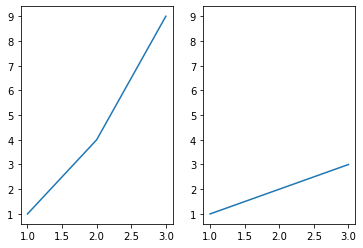

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot([1, 2, 3], [1, 4, 9])
ax2 = fig.add_subplot(122, sharey=ax1) ##########
ax2.plot([1, 2, 3], [1, 2, 3])
plt.show()

### squeeze와 flatten

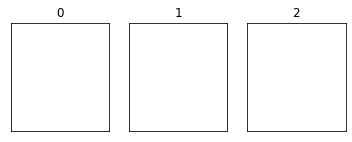

In [69]:
n, m = 1, 3

fig, axes = plt.subplots(n, m, squeeze=False, figsize=(m*2, n*2))
idx = 0
for i in range(n): # 1차원도 2차원처럼 인덱싱이 되도록.
    for j in range(m):
        axes[i][j].set_title(idx)
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        idx+=1

plt.show()

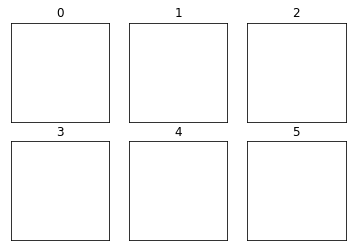

In [70]:
n, m = 2, 3

fig, axes = plt.subplots(n, m, figsize=(m*2, n*2))

for i, ax in enumerate(axes.flatten()): # 2차원도 1차원처럼 인덱싱이 되도록.
    ax.set_title(i)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### aspect

## Grid Spec

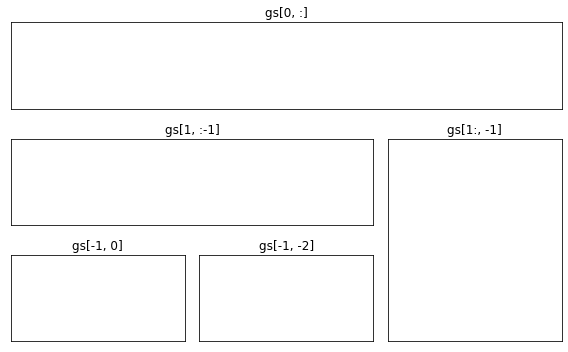

In [83]:
# add_gridspec
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.tight_layout()
plt.show()

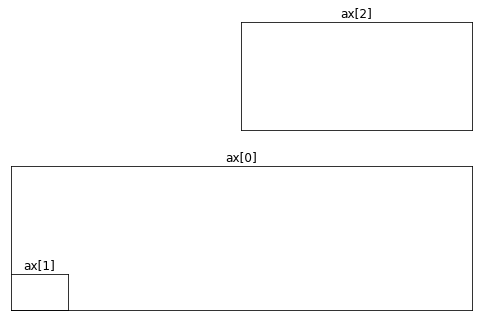

In [72]:
# add_axes
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.1,0.1,0.1,0.1])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.show()

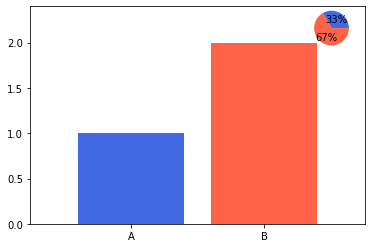

In [82]:
# inset_axes
fig, ax = plt.subplots()

color=['royalblue', 'tomato']
ax.bar(['A', 'B'], [1, 2],
       color=color
      )

ax.margins(0.2)
axin = ax.inset_axes([0.8, 0.8, 0.2, 0.2]) # 위치와 크기 설정
axin.pie([1, 2], colors=color, # 다른 차트를 넣을 수 있음.
         autopct='%1.0f%%')
plt.show()

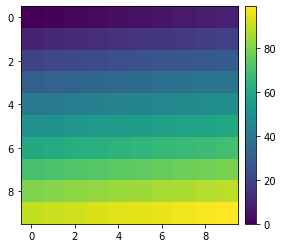

In [84]:
# make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)

im = ax.imshow(np.arange(100).reshape((10, 10)))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

fig.colorbar(im, cax=cax)
plt.show()

# More Tips

## Grid

In [85]:
np.random.seed(970725)

x = np.random.rand(20)
y = np.random.rand(20)

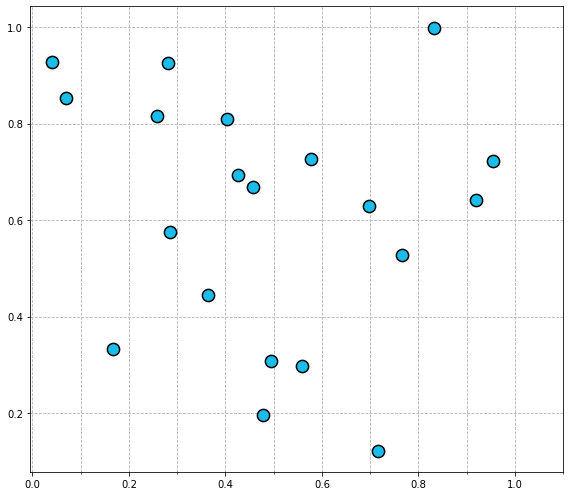

In [90]:
# 기본 grid
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.scatter(x, y, s=150, 
           c='#1ABDE9',
           linewidth=1.5,
           edgecolor='black', zorder=10)

ax.set_xticks(np.linspace(0, 1.1, 12, endpoint=True), minor=True) # minor ticks
    
ax.grid(zorder=0, linestyle='--', which='both') # 기본 grid

plt.tight_layout()
plt.show()

### x + y = c

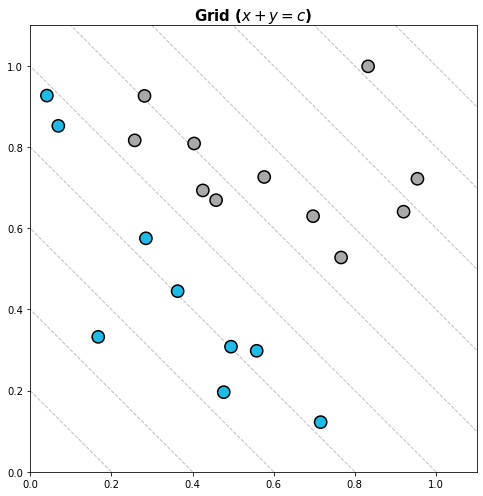

In [91]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)


ax.scatter(x, y, s=150, 
           c=['#1ABDE9' if xx+yy < 1.0 else 'darkgray' for xx, yy in zip(x, y)],
           linewidth=1.5,
           edgecolor='black', zorder=10)

############################## grid
x_start = np.linspace(0, 2.2, 12, endpoint=True) # 원하는 간격 설정

for xs in x_start: # 하나씩 그려줌.
    ax.plot([xs, 0], [0, xs], linestyle='--', color='gray', alpha=0.5, linewidth=1)

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid ($x+y=c$)", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

### y = cx

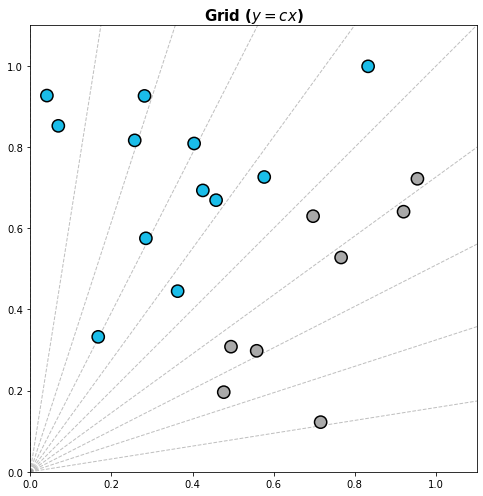

In [92]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)


ax.scatter(x, y, s=150, 
           c=['#1ABDE9' if yy/xx >= 1.0 else 'darkgray' for xx, yy in zip(x, y)],
           linewidth=1.5,
           edgecolor='black', zorder=10)

############################## grid
radian = np.linspace(0, np.pi/2, 11, endpoint=True) # 0~90도까지

for rad in radian:
    ax.plot([0,2], [0, 2*np.tan(rad)], linestyle='--', color='gray', alpha=0.5, linewidth=1)


ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid ($y=cx$)", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

### 동심원

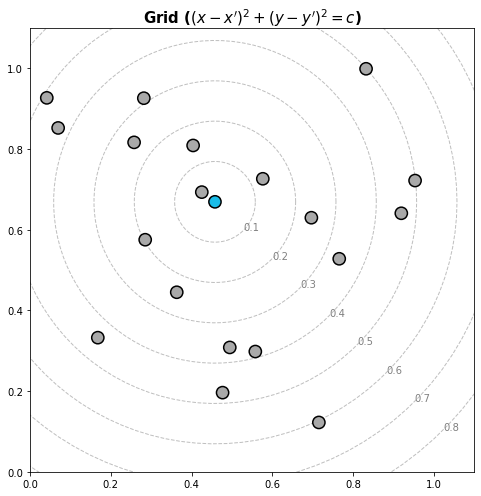

In [93]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)


ax.scatter(x, y, s=150, 
           c=['darkgray' if i!=2 else '#1ABDE9'  for i in range(20)] ,
           linewidth=1.5,
           edgecolor='black', zorder=10)

############################## grid
rs = np.linspace(0.1, 0.8, 8, endpoint=True) # 반지름 간격

for r in rs:
    xx = r*np.cos(np.linspace(0, 2*np.pi, 100)) # 0~360도까지
    yy = r*np.sin(np.linspace(0, 2*np.pi, 100))
    
    # (x[2], y[2])가 원의 중심.
    ax.plot(xx+x[2], yy+y[2], linestyle='--', color='gray', alpha=0.5, linewidth=1)

    ax.text(x[2]+r*np.cos(np.pi/4), y[2]-r*np.sin(np.pi/4), f'{r:.1}', color='gray')

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid ($(x-x')^2+(y-y')^2=c$)", fontsize=15,va= 'center', fontweight='semibold')

plt.tight_layout()
plt.show()

## Line & Span

### Line

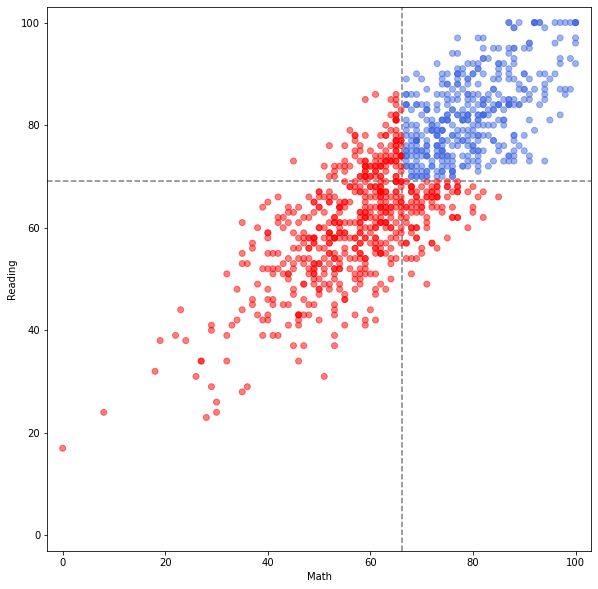

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect(1)

math_mean = student['math score'].mean()
reading_mean = student['reading score'].mean()

# 평균 선 그리기
ax.axvline(math_mean, color='gray', linestyle='--')
ax.axhline(reading_mean, color='gray', linestyle='--')

ax.scatter(x=student['math score'], y=student['reading score'],
           alpha=0.5,
           # 특정 범위의 선 색상을 다르게 함.
           color=['royalblue' if m>math_mean and r>reading_mean else 'red'  for m, r in zip(student['math score'], student['reading score'])],
           zorder=10,
          )

ax.set_xlabel('Math')
ax.set_ylabel('Reading')

ax.set_xlim(-3, 103)
ax.set_ylim(-3, 103)
plt.show()

### Span

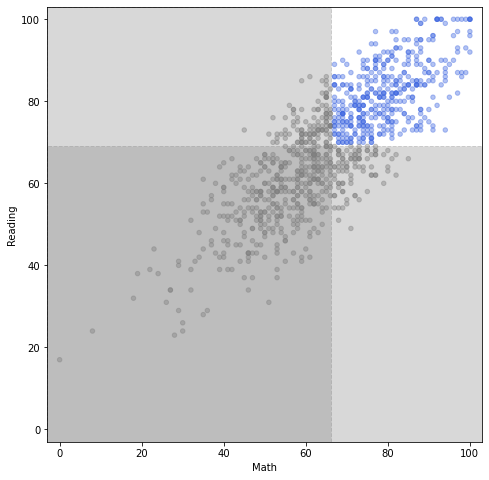

In [96]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)

math_mean = student['math score'].mean()
reading_mean = student['reading score'].mean()

ax.axvspan(-3, math_mean, color='gray', linestyle='--', zorder=0, alpha=0.3) # 점들 밑에 보여지도록
ax.axhspan(-3, reading_mean, color='gray', linestyle='--', zorder=0, alpha=0.3)

ax.scatter(x=student['math score'], y=student['reading score'],
           alpha=0.4, s=20,
           color=['royalblue' if m>math_mean and r>reading_mean else 'gray'  for m, r in zip(student['math score'], student['reading score'])],
           zorder=10,
          )

ax.set_xlabel('Math')
ax.set_ylabel('Reading')

ax.set_xlim(-3, 103)
ax.set_ylim(-3, 103)
plt.show()

### Spines

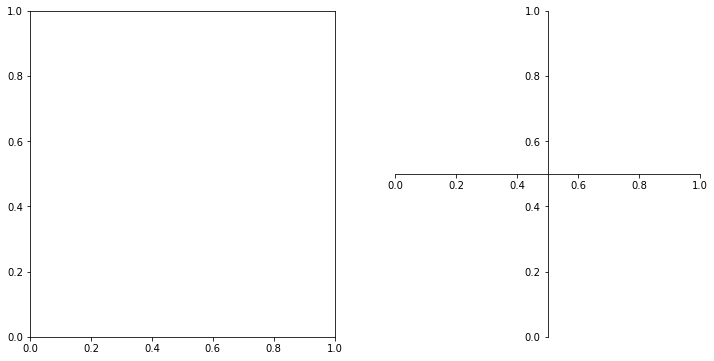

In [101]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax1.spines['left'].set_position('center')
ax1.spines['bottom'].set_position('center')

ax2.spines['left'].set_position(('data', 0.3)) # 데이터 좌표값 기준
ax2.spines['bottom'].set_position(('axes', 0.2)) # 축 전체 비율 기준

ax2.set_ylim(-1, 1)
plt.show()

# Seaborn 기초

In [102]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
##############################################
import seaborn as sns

print('seaborn version : ', sns.__version__)

seaborn version :  0.11.2


In [103]:
student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## countplot

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

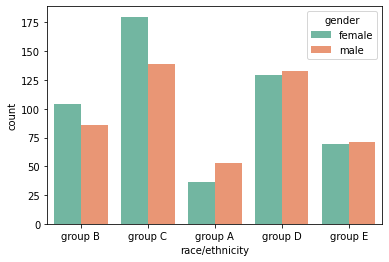

In [104]:
sns.countplot(x='race/ethnicity', # x축에 범주데이터 - 막대를 세로로 그림.
              data=student,
              hue='gender', # 성별 별로 그래프를 그림.
              palette='Set2' # 팔레트 변경
             )

<AxesSubplot:xlabel='gender', ylabel='count'>

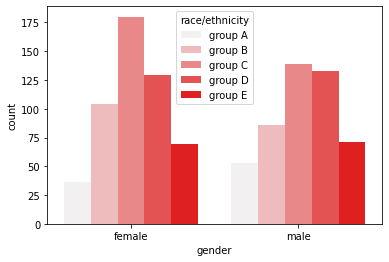

In [107]:
sns.countplot(x='gender',data=student,
              hue='race/ethnicity', 
              hue_order=sorted(student['race/ethnicity'].unique()), # 세부 그룹 순서 정하기
              color='red' # 그라데이션 색 지정
             )

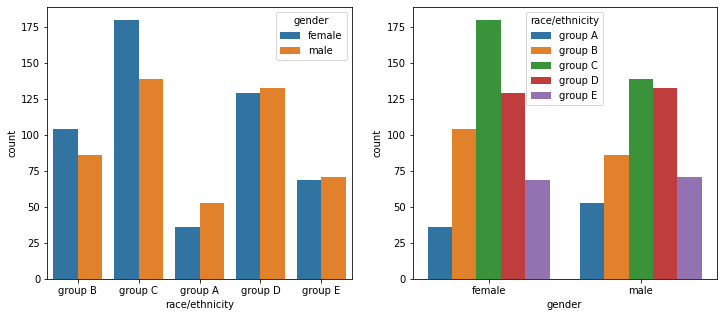

In [108]:
# 서브 플롯에 넣기
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='race/ethnicity',data=student,
              hue='gender', 
              ax=axes[0]
             )

sns.countplot(x='gender',data=student,
              hue='race/ethnicity', 
              hue_order=sorted(student['race/ethnicity'].unique()), 
              ax=axes[1]
             )

plt.show()

In [109]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Categorical API

### Box Plot

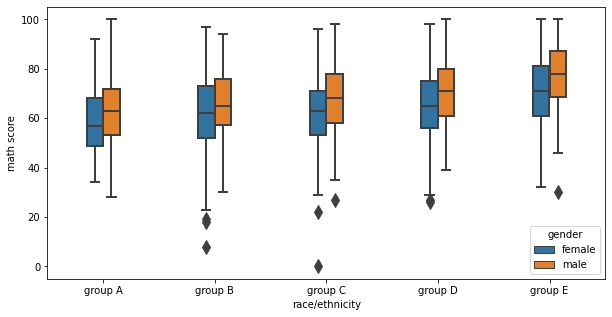

In [114]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(x='race/ethnicity', # 범주 별 box plot
            y='math score', 
            data=student, 
            hue='gender', # 세부 그룹
            order=sorted(student['race/ethnicity'].unique()),
            width=0.3,
            linewidth=2,
            fliersize=10,
            ax=ax)
plt.show()

### Violin Plot

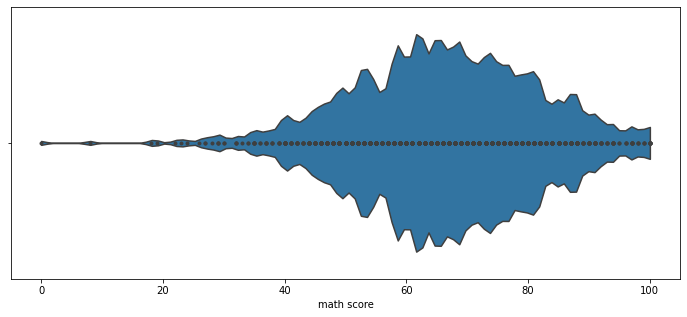

In [119]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
sns.violinplot(x='math score', data=student, ax=ax,
               bw=0.05, # 분포 표현의 세밀도
               cut=0, # 실제 데이터 범위에서 자름
               inner='point' # 내부 표현
              )
plt.show()

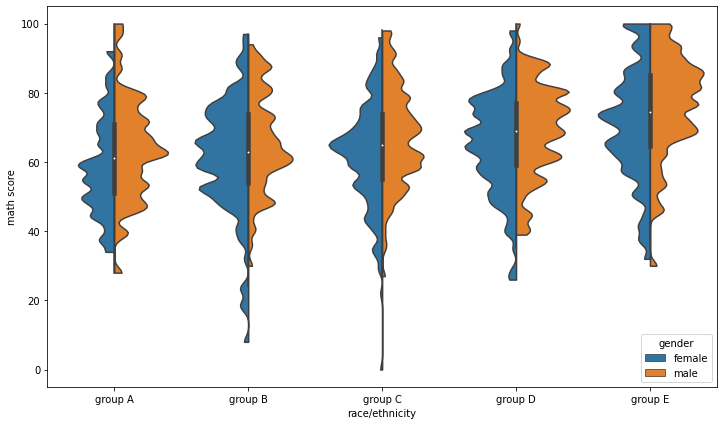

In [132]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.violinplot(x='race/ethnicity', 
               y='math score', 
               data=student, ax=ax,
               order=sorted(student['race/ethnicity'].unique()),
               hue='gender',
               split=True,    # 동시 표현
               scale='count', # 데이터 양에 따라 너비가 달라짐.
               bw=0.1, 
               cut=0
              )
plt.show()

### ETC

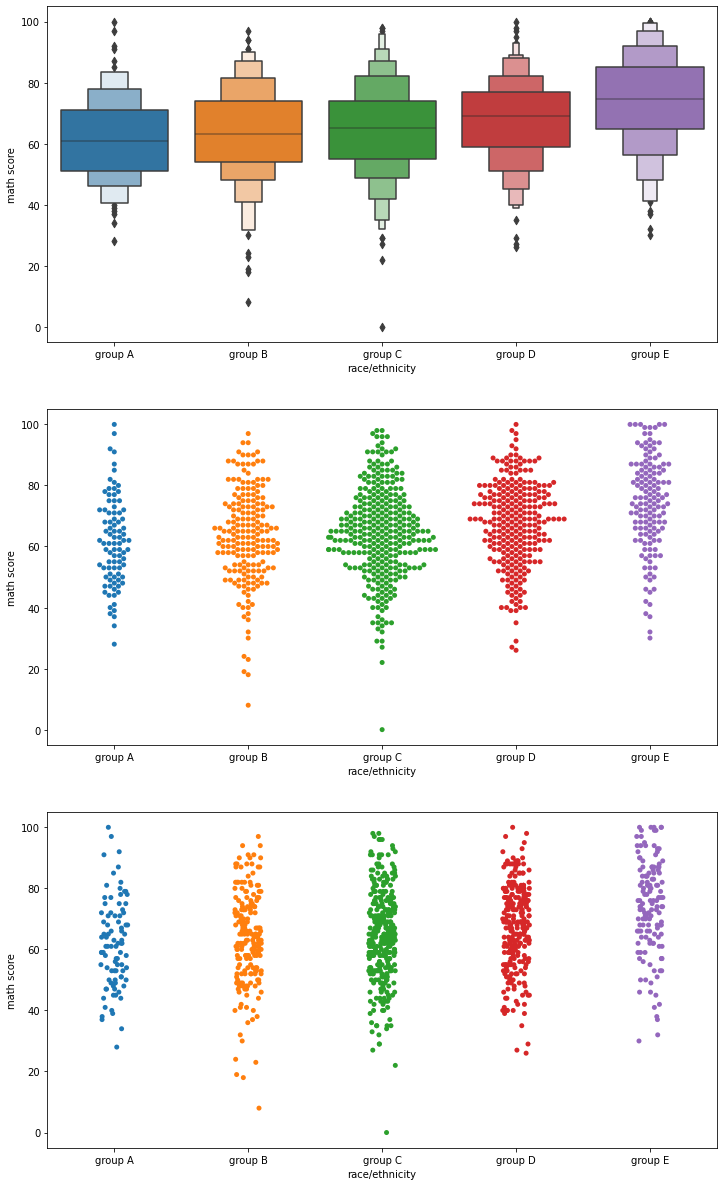

In [133]:
fig, axes = plt.subplots(3,1, figsize=(12, 21))
sns.boxenplot(x='race/ethnicity', y='math score', data=student, ax=axes[0],
               order=sorted(student['race/ethnicity'].unique()))

sns.swarmplot(x='race/ethnicity', y='math score', data=student, ax=axes[1],
               order=sorted(student['race/ethnicity'].unique()))

sns.stripplot(x='race/ethnicity', y='math score', data=student, ax=axes[2],
               order=sorted(student['race/ethnicity'].unique()))
plt.show()

## Distribution